# Import Modules

In [1]:
import requests
import json
from bs4 import BeautifulSoup
import random
import pandas as pd
from PIL import Image
from io import BytesIO

# Class

In [ ]:
class BooksToScrapProcessor:
    def __init__(self):
        pass

    def get_link_from_page(self, page:int):
        """ """
        return "https://books.toscrape.com/catalogue/page-" + str(page) + ".html"
    
    def scrap_url(self, url:str):
        return requests.get(url)
    
    def scrap_page(self, page:int):
        url = self.get_link_from_page(page)
        return self.scrap_url(url)

# Kit 1

## Scrap website

In [9]:
url = "https://books.toscrape.com"
response = requests.get(url)

In [17]:
soup = BeautifulSoup(response.content, "html.parser")

In [37]:
ScrapProcessor = BooksToScrapProcessor()

## Create CSV
Books with more than 4 stars and less than 30£ and on the first three pages

In [93]:
list_books = []
for i in range(1,4):
    response = ScrapProcessor.scrap_page(i)
    soup = BeautifulSoup(response.content, "html.parser")
    books = soup.find_all("article", class_="product_pod")
    
    for book in books:
        rating = book.find("p", class_="star-rating Five")
        price = book.find("div", class_="product_price").find("p", class_="price_color").text.strip("£")
        title = book.find("h3").find("a")["title"]
        if rating is not None and float(price) < 30:
            book_to_store={
                "title":title,
                "price":price,
            }
            list_books.append(book_to_store)

In [94]:
with open("Books_5starts_less30pounds.csv", mode="w") as f:
    for book in list_books:
        line=f"{book["title"]}, {book["price"]}\n"
        f.write(line)

# Kit 2

In [12]:
response = requests.get("https://jsonplaceholder.typicode.com/posts")

In [13]:
class CatProcessor:
    def __init__(self):
        self.api_key = 'live_XMw4Jxwq8bZFjyOAAIId4Ayi8uKi2iBk3snIjxVZHrj3ZY4fdQQQGmdTHqdm5gc5'

    def show_a_random_cat(self):
        cat_url = self.get_random_cat_urls(n=1)[0]
        image = self.load_image(cat_url)
        return image

    def get_random_cat_urls(self, n):
        url = f"https://api.thecatapi.com/v1/images/search?limit={n}&api_key={self.api_key}"
        data = requests.get(url).json()
        cat_urls = []
        for cat in data:
            cat_urls.append(cat["url"])
        return cat_urls
    
    def load_image(self, url):
        image = requests.get(url)
        image = Image.open(BytesIO(image.content))
        return image

In [14]:
catURL = "https://thecatapi.com"
dogURL = "https://docs.thedogapi.com"

api_key = "live_eAyzWfD9sJqwfGEu1cZexpZ9dGw1WwyanngPbHzl80MZdij1MefB1dNSNt9WdmL7"
URLs = [catURL, dogURL]

In [15]:
def getRandomPictureCatDog():
    randomNumber = random.randrange(0,100,1)
    if randomNumber < 95:
        print("Here a random picture of a cat. Cool isn't it ?")
        image = requests.get("https://api.thecatapi.com/v1/images/search")
    else:
        print("You were unlucky, you got a dog image.")
        print("Not implement, because who would want to see a dog ???")
    

In [16]:
def getRandomPicture(number_picture):
    request_string = f"https://api.thecatapi.com/v1/images/search?limit={number_picture}&api_key={api_key}"
    images = requests.get(request_string)
    return images.json()

In [17]:
def getRandomGIF(number_picture):
    request_string = f"https://api.thecatapi.com/v1/images/search?limit={number_picture}&mime_types=gif&api_key={api_key}"
    images = requests.get(request_string)
    return images.json()

In [18]:
def getBreedList():
    request_string = f"https://api.thecatapi.com/v1/breeds/?api_key={api_key}"
    breeds = requests.get(request_string)
    return breeds

breeds = getBreedList()
df_breeds = pd.DataFrame(breeds.json())[["id","name"]]

In [19]:
def getPictureBreed(number_picture, breed_name):
    id = df_breeds[df_breeds["name"]==breed_name]["id"].values[0]
    request_string = f"https://api.thecatapi.com/v1/images/search?limit={number_picture}&breed_ids={id}&api_key={api_key}"
    images = requests.get(request_string)
    return images.json()

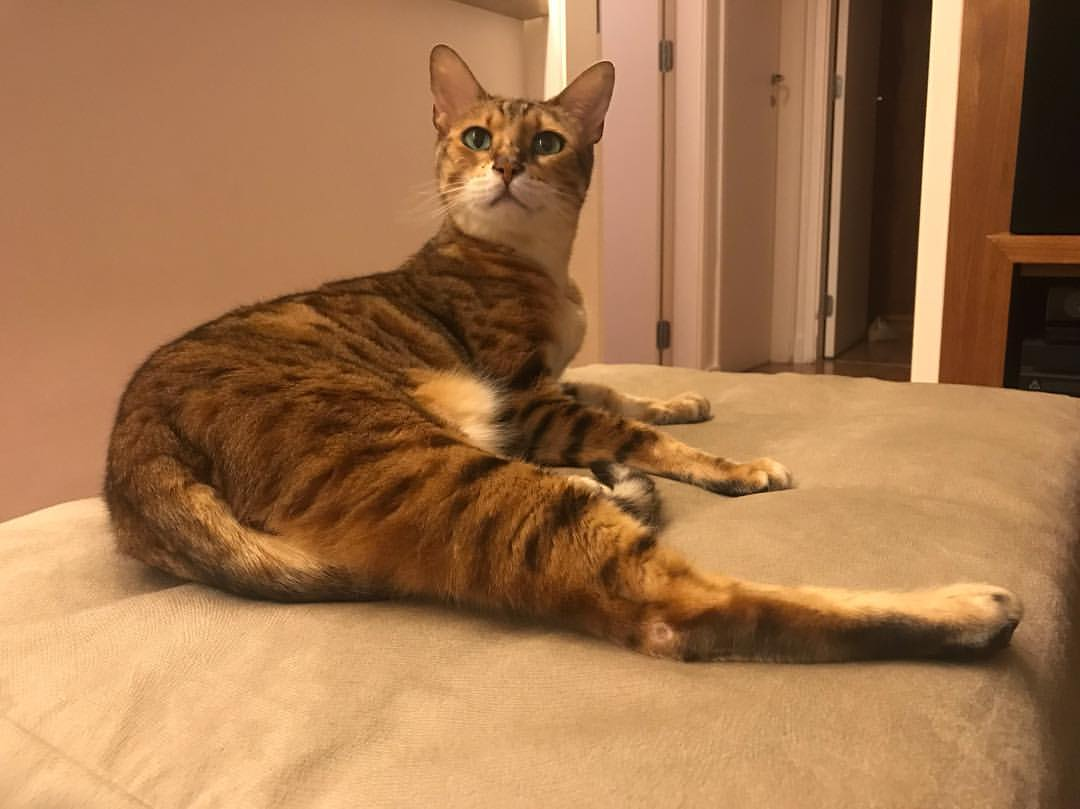

In [20]:
three_bengals = getPictureBreed(3, "Bengal")
image = requests.get(three_bengals[0]["url"])
Image.open(BytesIO(image.content))

In [57]:
def voteImage(image_id, vote):
    url = f"https://api.thecatapi.com/v1/votes"
    payload = {
        "image_id":image_id,
        "sub_id": "David Nadjar",
        "value": vote,
    }
    headers= {
        "x-api-key": api_key,
    }
    
    response = requests.post(url, json=payload, headers=headers)
    if response.status_code == 201:
        print("Your vote was a success")
    return response

id_bengal = three_bengals[0]["id"]
response_vote = voteImage(id_bengal, 10)

Your vote was a success


In [65]:
def deleteVote(vote_id):
    url = f"https://api.thecatapi.com/v1/votes?vote_id={vote_id}"
    headers= {
        "x-api-key": api_key,
    }
    requests.delete(url, headers=headers)
    if response.json()["message"] == "SUCCESS":
        print("Your vote was deleted")
    return response

vote_id = response_vote.json()["id"]

response_delete = deleteVote(vote_id)

Your vote was deleted


In [68]:
requests.post("https://api.thecatapi.com/v1/votes?vote_id=56496541")

<Response [401]>